In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
import time

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

In [4]:
for col in df.columns:
    print(col)

id
sudden_fever
headache
mouth_bleed
nose_bleed
muscle_pain
joint_pain
vomiting
rash
diarrhea
hypotension
pleural_effusion
ascites
gastro_bleeding
swelling
nausea
chills
myalgia
digestion_trouble
fatigue
skin_lesions
stomach_pain
orbital_pain
neck_pain
weakness
back_pain
weight_loss
gum_bleed
jaundice
coma
diziness
inflammation
red_eyes
loss_of_appetite
urination_loss
slow_heart_rate
abdominal_pain
light_sensitivity
yellow_skin
yellow_eyes
facial_distortion
microcephaly
rigor
bitter_tongue
convulsion
anemia
cocacola_urine
hypoglycemia
prostraction
hyperpyrexia
stiff_neck
irritability
confusion
tremor
paralysis
lymph_swells
breathing_restriction
toe_inflammation
finger_inflammation
lips_irritation
itchiness
ulcers
toenail_loss
speech_problem
bullseye_rash
prognosis


In [5]:
df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [6]:
# 11 Unique diseases being tested
len(df['prognosis'].unique())

11

In [7]:
# Percentage of each diseas within dataset
(df.groupby('prognosis')['id'].count()/706)*100

prognosis
Chikungunya               9.348442
Dengue                    8.923513
Japanese_encephalitis    11.473088
Lyme_disease              7.365439
Malaria                   6.798867
Plague                    7.507082
Rift_Valley_fever         9.915014
Tungiasis                 9.915014
West_Nile_fever          12.039660
Yellow_Fever              8.640227
Zika                      8.215297
Name: id, dtype: float64

## Correlation analysis

In [8]:
# # Calculate the correlation matrix
# corr_matrix = df.corr()

# # Set up the figure
# fig, ax = plt.subplots(figsize=(10, 8))

# # Create a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Add a title
# ax.set_title('Correlation Heatmap for Train Dataframe', fontsize=18)

# # Create a mask for the upper triangle of the heatmap
# mask = np.zeros_like(corr_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# # Rotate the tick labels
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(rotation=0, fontsize=12)

# # Fix the top and bottom margins
# plt.subplots_adjust(top=0.93, bottom=0.1)

# # Display the plot
# plt.show()

In [9]:
# # Filter the correlation matrix to only show correlations above 0.5
# high_corr = corr_matrix[corr_matrix.abs() > 0.5]

# # Set up the figure
# fig, ax = plt.subplots(figsize=(10, 8))

# # Draw the heatmap with the high correlation matrix
# sns.heatmap(high_corr, cmap=cmap, annot=True, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# # Add a title
# ax.set_title('Correlation Heatmap for Train Dataframe (Correlation > 0.5)', fontsize=18)

# # Rotate the tick labels
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(rotation=0, fontsize=12)

# # Fix the top and bottom margins
# plt.subplots_adjust(top=0.93, bottom=0.1)

# # Display the plot
# plt.show()


In [10]:
# # Calculate the correlation matrix
# corr_matrix = df.corr()

# # Get the top 20 correlations
# corrDf = pd.DataFrame(corr_matrix.unstack().drop_duplicates(), columns=['Correlation'])
# corrDf = corrDf[corrDf['Correlation'] != 1.0]

In [11]:
# corrDf.describe()

In [12]:
# corrDf = corrDf.iloc[abs(corrDf['Correlation']).argsort()[::-1]]

In [13]:
# corrDf.head(40)

### Feature Clustering

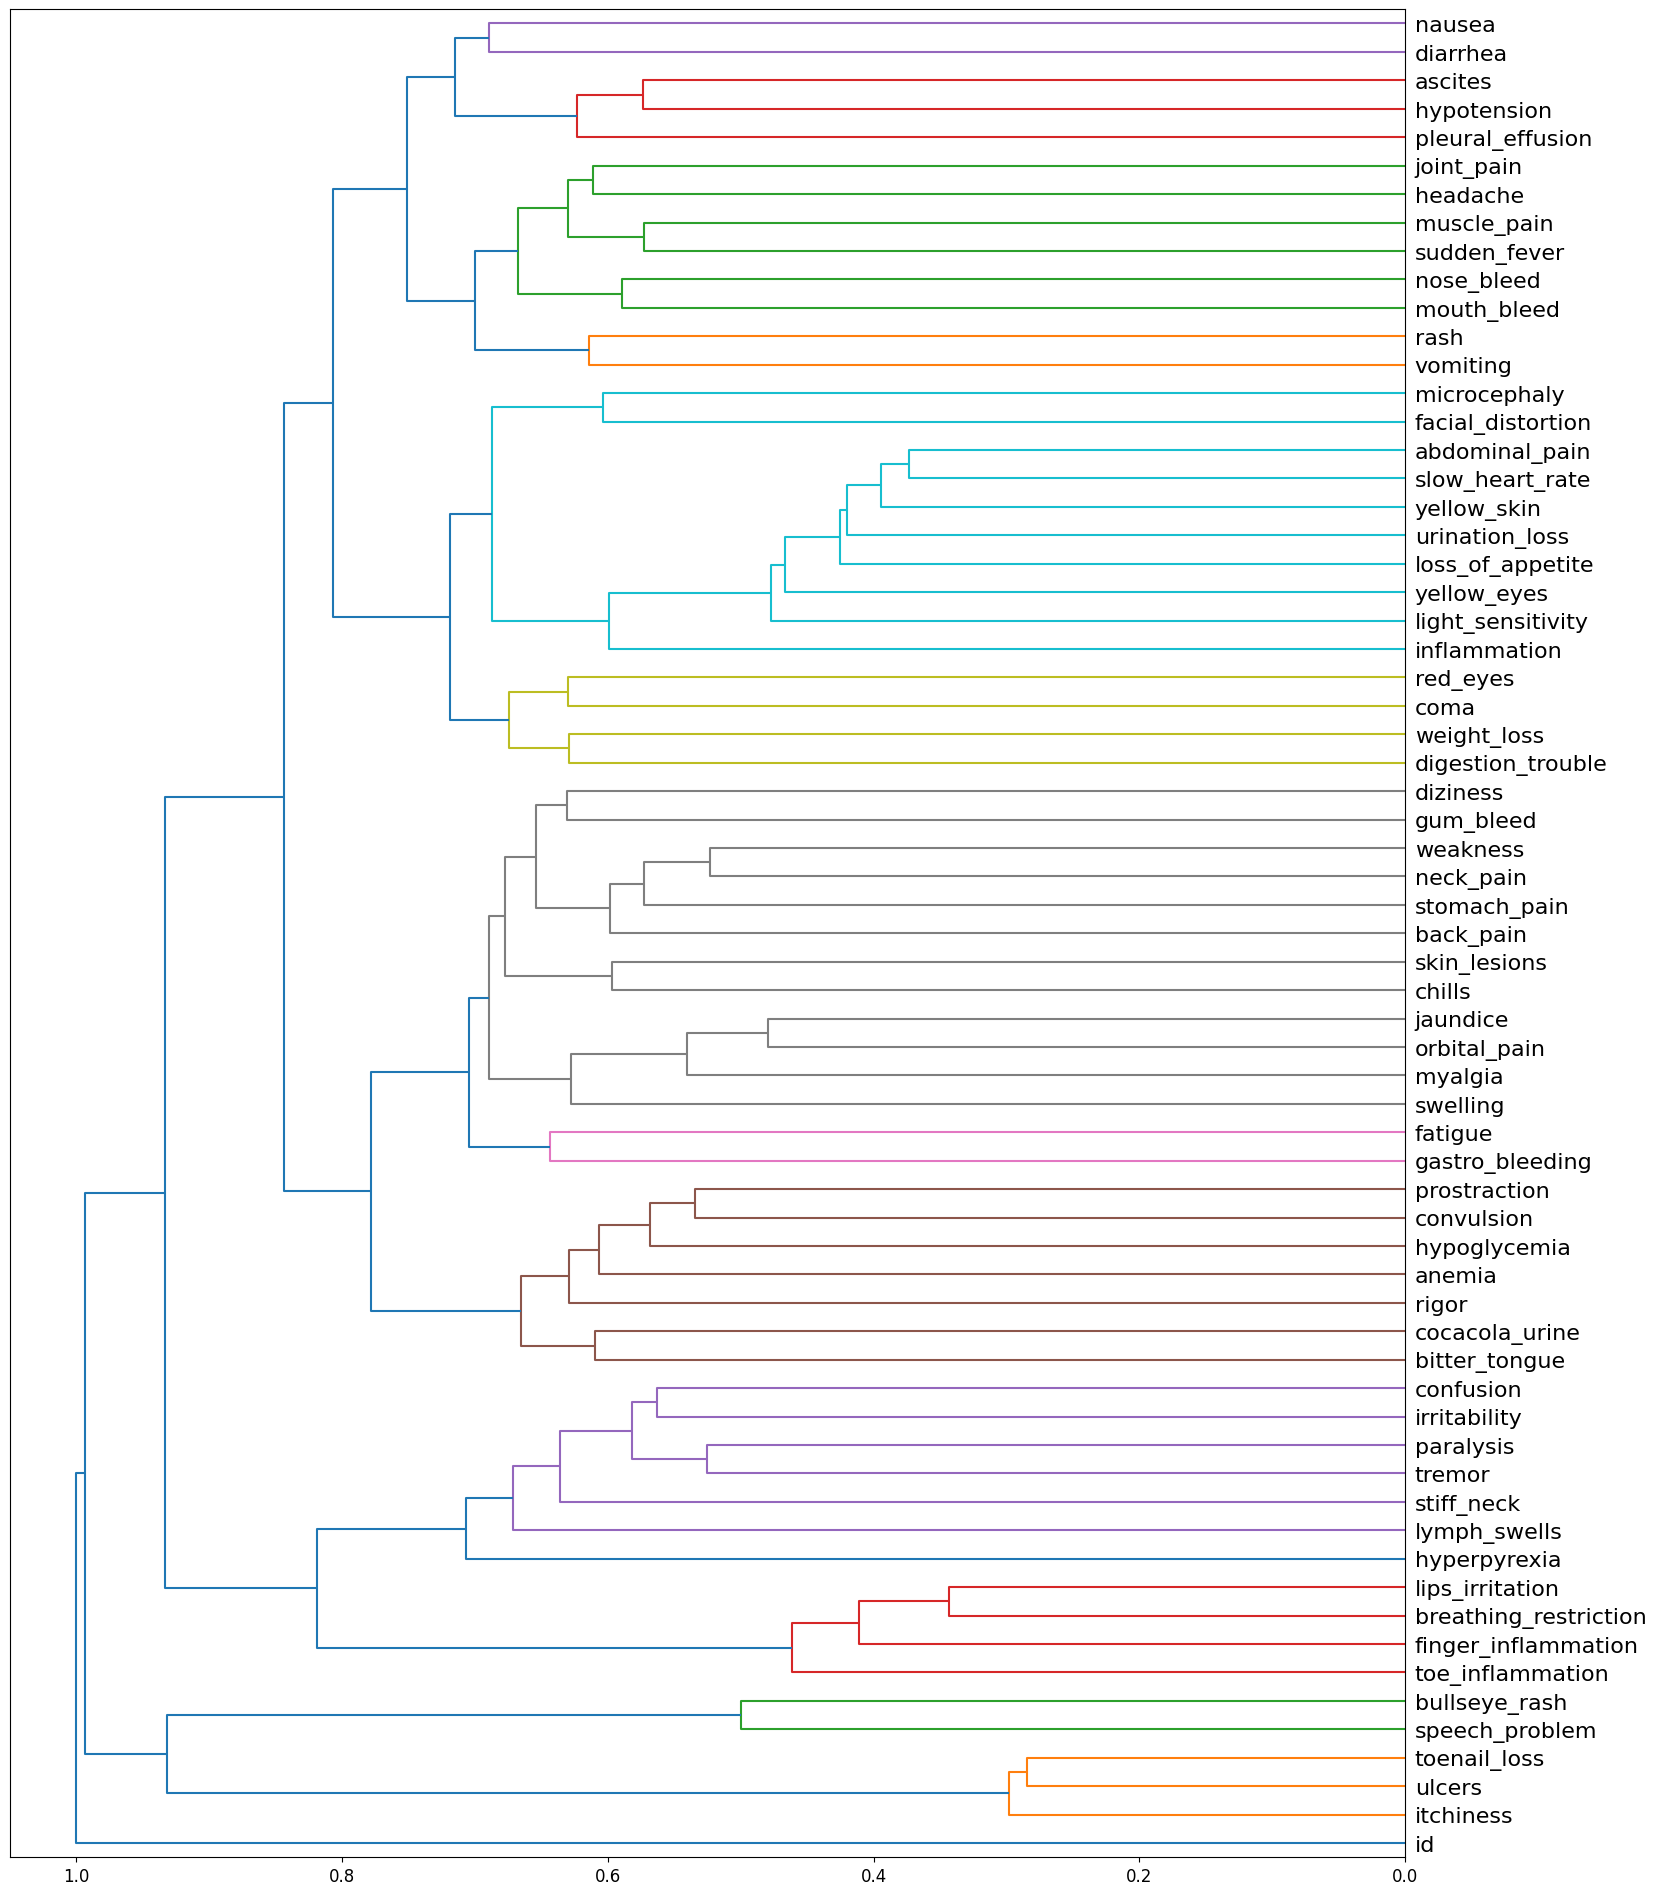

In [14]:
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Drop the 'prognosis' column
X = df.drop('prognosis', axis=1)

# Calculate the pairwise distance matrix
dist_mat = pdist(X.values.T, metric='jaccard')

# Use hierarchical clustering to group the features
linkage1 = hierarchy.complete(dist_mat)
clusters = hierarchy.fcluster(linkage1, t=1.0, criterion='distance')

# Plot a dendrogram of the clustering
plt.figure(figsize=(18, 24))
dn = hierarchy.dendrogram(linkage1, labels=X.columns, orientation='left')

# Set larger font size for axis labels
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=12)

plt.show()



In [15]:
clusterOrder = dn['ivl']

In [16]:
# Note that hyperprexia is not clusered with any other symptom, however it indicates high fever which seems important
c1 = clusterOrder[1:4]
c2 = clusterOrder[4:6]
c3 = clusterOrder[6:10]
c4 = clusterOrder[11:17]
c5 = clusterOrder[17:24]
c6 = clusterOrder[24:26]
c7 = clusterOrder[26:38]
c8 = clusterOrder[38:42]
c9 = clusterOrder[42:52]
c10 = clusterOrder[52:54]
c11 = clusterOrder[54:60]
c12 = clusterOrder[60:63]
c13 = clusterOrder[63:65]

In [17]:
all_clusters = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13]

In [18]:
bc1 = c1 + c2
bc1

['itchiness', 'ulcers', 'toenail_loss', 'speech_problem', 'bullseye_rash']

In [19]:
bc2 = c3 + c4
bc2

['toe_inflammation',
 'finger_inflammation',
 'breathing_restriction',
 'lips_irritation',
 'lymph_swells',
 'stiff_neck',
 'tremor',
 'paralysis',
 'irritability',
 'confusion']

In [20]:
bc3 = c5 + c6 + c7
bc3

['bitter_tongue',
 'cocacola_urine',
 'rigor',
 'anemia',
 'hypoglycemia',
 'convulsion',
 'prostraction',
 'gastro_bleeding',
 'fatigue',
 'swelling',
 'myalgia',
 'orbital_pain',
 'jaundice',
 'chills',
 'skin_lesions',
 'back_pain',
 'stomach_pain',
 'neck_pain',
 'weakness',
 'gum_bleed',
 'diziness']

In [21]:
bc4 = c8 + c9
bc4

['digestion_trouble',
 'weight_loss',
 'coma',
 'red_eyes',
 'inflammation',
 'light_sensitivity',
 'yellow_eyes',
 'loss_of_appetite',
 'urination_loss',
 'yellow_skin',
 'slow_heart_rate',
 'abdominal_pain',
 'facial_distortion',
 'microcephaly']

In [22]:
bc5 = c10 + c11 + c12 + c13
bc5

['vomiting',
 'rash',
 'mouth_bleed',
 'nose_bleed',
 'sudden_fever',
 'muscle_pain',
 'headache',
 'joint_pain',
 'pleural_effusion',
 'hypotension',
 'ascites',
 'diarrhea',
 'nausea']

## Split Train and Test Data

In [23]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
le = LabelEncoder()

# Encode the class labels in y_train
y_train = le.fit_transform(y_train)

# Encode the class labels in y_test
y_test = le.transform(y_test)

# Check the unique values of the encoded class labels
print(np.unique(y_train))
print(np.unique(y_test))


[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [25]:
# Create a list of unique values in the prognosis column
unique_labels = df['prognosis'].unique()

# Create a dictionary to map the unique labels to integers
label_encoding = {label: i for i, label in enumerate(unique_labels)}
legend = pd.DataFrame.from_dict(label_encoding, orient='index', columns=['Encoded_Label'])

legend

,Encoded_Label
Lyme_disease,0
Tungiasis,1
Zika,2
Rift_Valley_fever,3
West_Nile_fever,4
Malaria,5
Chikungunya,6
Plague,7
Dengue,8
Yellow_Fever,9


## Model 1: Logistic Regression - 31.69% Accurate

In [26]:
class_weights = {
    6: 1/9.348442,
    8: 1/8.923513,
    10: 1/11.473088,
    0: 1/7.365439,
    5: 1/6.798867,
    7: 1/7.507082,
    3: 1/9.915014,
    1: 1/9.915014,
    4: 1/12.039660,
    9: 1/8.640227,
    2: 1/8.215297
}


In [27]:

# Train a logistic regression model
log = LogisticRegression(max_iter=100000, C=1, solver='newton-cg', class_weight=class_weights)
log.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log.predict(X_test)

# Calculate accuracy score and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {acc}')


Accuracy: 0.29107981220657275


In [28]:
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    clf = LogisticRegression(max_iter=100000, C=i, solver='newton-cg', class_weight=class_weights)
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate accuracy score and confusion matrix
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f'Accuracy: {acc} for C={i}')
    

Accuracy: 0.107981220657277 for C=0.0001
Accuracy: 0.15023474178403756 for C=0.001
Accuracy: 0.22065727699530516 for C=0.01
Accuracy: 0.2676056338028169 for C=0.1
Accuracy: 0.29107981220657275 for C=1
Accuracy: 0.29107981220657275 for C=10
Accuracy: 0.23943661971830985 for C=100
Accuracy: 0.2676056338028169 for C=1000


## Model 2: Gausian Naive Bayes - 31.69% Accurate

In [29]:
nb = GaussianNB(var_smoothing=0.0000001)

# Train the classifier on the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Evaluate the performance of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred, zero_division=1))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.26291079812206575
Classification Report:               precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.39      0.33      0.36        21
           2       0.33      0.07      0.11        30
           3       0.43      0.53      0.47        17
           4       0.14      0.41      0.21        17
           5       0.00      0.00      0.00        15
           6       0.09      0.06      0.07        18
           7       0.62      0.68      0.65        19
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        21
          10       0.05      0.21      0.08        14

    accuracy                           0.26       213
   macro avg       0.24      0.28      0.24       213
weighted avg       0.25      0.26      0.23       213

Confusion Matrix: [[14  1  0  0  1  0  0  0  0  0  1]
 [ 3  7  0  0  4  0  3  3  0  0  1]
 [ 0  2  2  1  9  0  4  0  0  0 12]
 [ 0  1 

In [30]:
for i in [0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:
    nb = GaussianNB(var_smoothing=i)

    # Train the classifier on the training data
    nb.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = nb.predict(X_test)

    # Evaluate the performance of the classifier
    print('Accuracy:', accuracy_score(y_test, y_pred), f'for smoothing={i}')


Accuracy: 0.2535211267605634 for smoothing=1e-10
Accuracy: 0.24882629107981222 for smoothing=1e-09
Accuracy: 0.26291079812206575 for smoothing=1e-08
Accuracy: 0.26291079812206575 for smoothing=1e-07
Accuracy: 0.25821596244131456 for smoothing=1e-06
Accuracy: 0.22065727699530516 for smoothing=1e-05
Accuracy: 0.19248826291079812 for smoothing=0.0001
Accuracy: 0.10328638497652583 for smoothing=0.001
Accuracy: 0.09389671361502347 for smoothing=0.01
Accuracy: 0.09389671361502347 for smoothing=0.1
Accuracy: 0.11267605633802817 for smoothing=1


## Model 3: Support Vector Machine

In [31]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='rbf', random_state=42, C=10000, gamma='scale')

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

In [32]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.26291079812206575


In [33]:
for i in [0.001, 0.01, 0.1, 10, 100, 1000, 10000, 100000]:
    start_time = time.time()
    # Create an SVM classifier with a linear kernel
    svm = SVC(kernel='rbf', C=i, gamma='scale')

    # Train the classifier on the training data
    svm.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svm.predict(X_test)
    
    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()

    # Print the accuracy score
    print(f"Accuracy: {accuracy} for C={i}... {end_time - start_time} seconds")

Accuracy: 0.11267605633802817 for C=0.001... 0.02292466163635254 seconds
Accuracy: 0.11267605633802817 for C=0.01... 0.021559715270996094 seconds
Accuracy: 0.11267605633802817 for C=0.1... 0.021426916122436523 seconds
Accuracy: 0.08450704225352113 for C=10... 0.025970458984375 seconds
Accuracy: 0.0892018779342723 for C=100... 0.030318737030029297 seconds
Accuracy: 0.2347417840375587 for C=1000... 0.06542825698852539 seconds
Accuracy: 0.26291079812206575 for C=10000... 0.37096142768859863 seconds
Accuracy: 0.2676056338028169 for C=100000... 1.0141499042510986 seconds


## Model 4: Random Forrest

In [34]:
# Create a Random Forest classifier with 100 trees
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf1.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rf1.predict(X_test)

# Evaluate the performance of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3051643192488263


#### Grid search

In [35]:
# %%time
# # Create a Random Forest classifier with default hyperparameters
# rf = RandomForestClassifier(random_state=42)

# # Define the grid of hyperparameters to search over
# param_grid = {
#     'n_estimators': [64, 128, 256, 512],
#     'max_depth': [64, 128, 256],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [4, 8, 16, 32],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create a GridSearchCV object and fit it to the training data
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=3)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and accuracy score
# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Accuracy Score: {grid_search.best_score_}")


In [36]:
# Create a Random Forest classifier with 100 trees
rf2 = RandomForestClassifier(max_depth=64, max_features='log2', min_samples_leaf=4, min_samples_split=5, n_estimators=512)

# Fit the classifier to the training data
rf2.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rf2.predict(X_test)

# Evaluate the performance of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.29577464788732394


####  feature-level ensembling

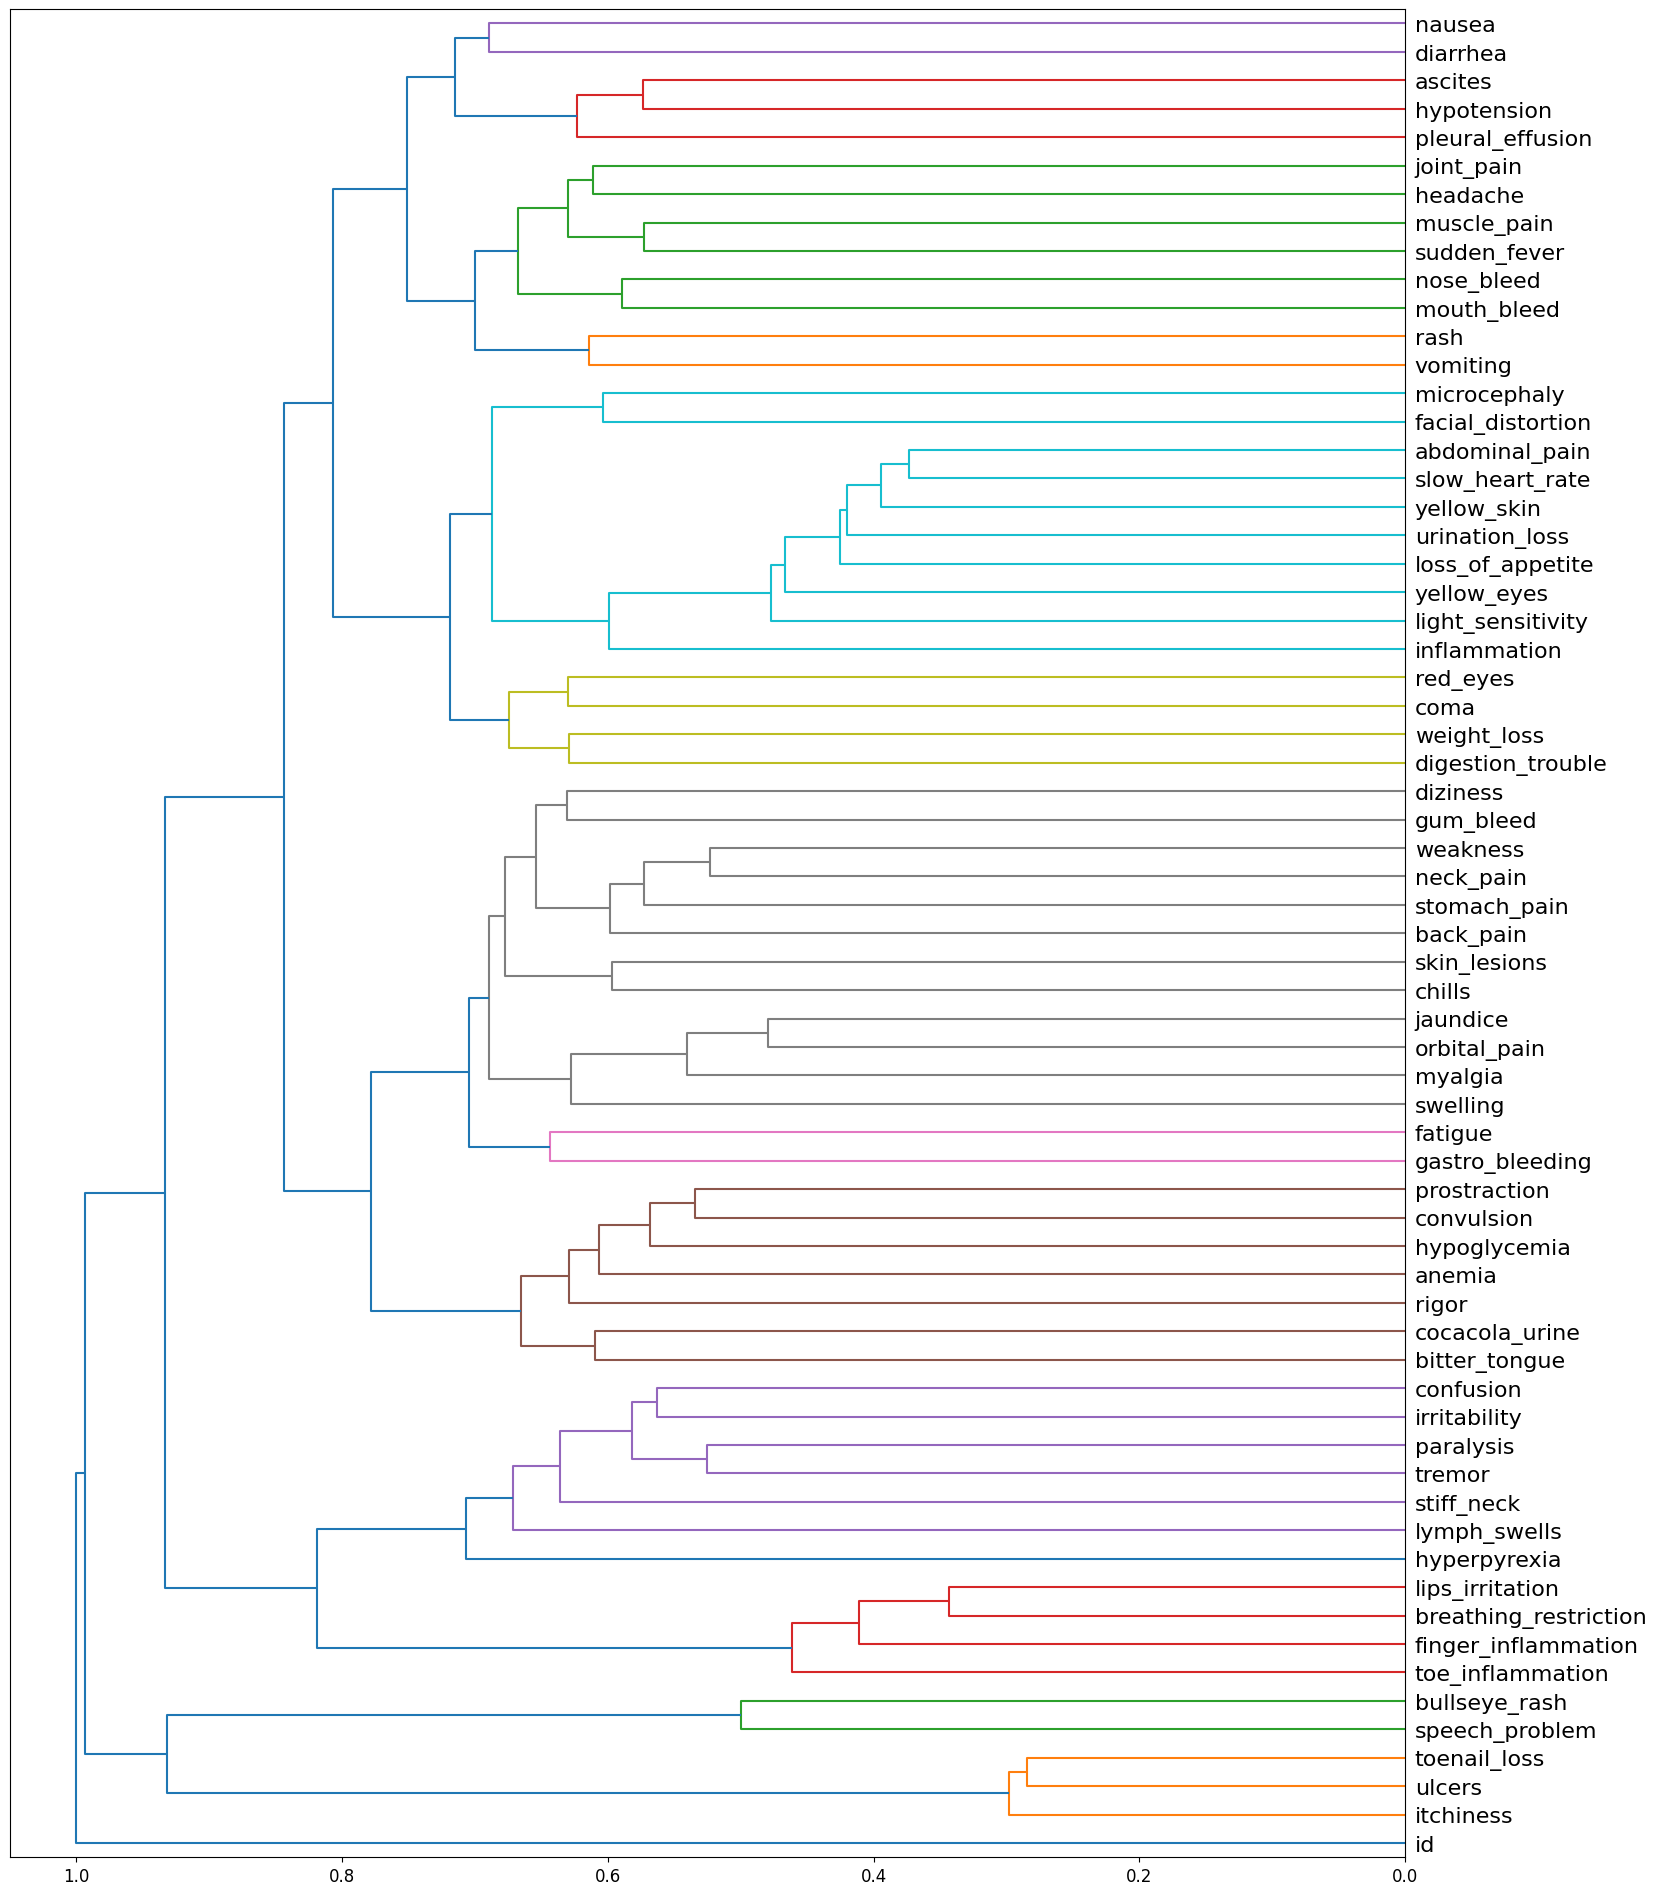

In [37]:
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Drop the 'prognosis' column
X = df.drop('prognosis', axis=1)

# Calculate the pairwise distance matrix
dist_mat = pdist(X.values.T, metric='jaccard')

# Use hierarchical clustering to group the features
linkage1 = hierarchy.complete(dist_mat)
clusters = hierarchy.fcluster(linkage1, t=1.0, criterion='distance')

# Plot a dendrogram of the clustering
plt.figure(figsize=(18, 24))
dn = hierarchy.dendrogram(linkage1, labels=X.columns, orientation='left')

# Set larger font size for axis labels
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=12)

plt.show()


In [38]:
i = 1
for cluster in all_clusters:
    print(f'Cluster: {i}')
    for feature in cluster:
        print(feature)
    print('\n')
    i = i + 1

Cluster: 1
itchiness
ulcers
toenail_loss


Cluster: 2
speech_problem
bullseye_rash


Cluster: 3
toe_inflammation
finger_inflammation
breathing_restriction
lips_irritation


Cluster: 4
lymph_swells
stiff_neck
tremor
paralysis
irritability
confusion


Cluster: 5
bitter_tongue
cocacola_urine
rigor
anemia
hypoglycemia
convulsion
prostraction


Cluster: 6
gastro_bleeding
fatigue


Cluster: 7
swelling
myalgia
orbital_pain
jaundice
chills
skin_lesions
back_pain
stomach_pain
neck_pain
weakness
gum_bleed
diziness


Cluster: 8
digestion_trouble
weight_loss
coma
red_eyes


Cluster: 9
inflammation
light_sensitivity
yellow_eyes
loss_of_appetite
urination_loss
yellow_skin
slow_heart_rate
abdominal_pain
facial_distortion
microcephaly


Cluster: 10
vomiting
rash


Cluster: 11
mouth_bleed
nose_bleed
sudden_fever
muscle_pain
headache
joint_pain


Cluster: 12
pleural_effusion
hypotension
ascites


Cluster: 13
diarrhea
nausea




In [39]:
# Create a dataframe that contains the symptoms and their assigned cluster labels
symptoms = ['itchiness', 'ulcers', 'toenail_loss', 'speech_problem', 'bullseye_rash', 
            'toe_inflammation', 'finger_inflammation', 'breathing_restriction', 'lips_irritation', 
            'lymph_swells', 'stiff_neck', 'tremor', 'paralysis', 'irritability', 'confusion', 
            'bitter_tongue', 'cocacola_urine', 'rigor', 'anemia', 'hypoglycemia', 'convulsion', 'prostraction',
            'gastro_bleeding', 'fatigue', 'swelling', 'myalgia', 'orbital_pain', 'jaundice', 'chills', 
            'skin_lesions', 'back_pain', 'stomach_pain', 'neck_pain', 'weakness', 'gum_bleed', 'diziness', 
            'digestion_trouble', 'weight_loss', 'coma', 'red_eyes', 'inflammation', 'light_sensitivity', 
            'yellow_eyes', 'loss_of_appetite', 'urination_loss', 'yellow_skin', 'slow_heart_rate', 
            'abdominal_pain', 'facial_distortion', 'microcephaly', 'vomiting', 'rash', 'mouth_bleed', 
            'nose_bleed', 'sudden_fever', 'muscle_pain', 'headache', 'joint_pain', 'pleural_effusion', 
            'hypotension', 'ascites', 'diarrhea', 'nausea', 'hyperpyrexia']
clusters = [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 
            7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 11, 11, 11, 
            11, 12, 12, 12, 13, 13, 0]
data = {'symptom': symptoms, 'cluster': clusters}
df = pd.DataFrame(data)

df


,symptom,cluster
0,itchiness,1
1,ulcers,1
2,toenail_loss,1
3,speech_problem,2
4,bullseye_rash,2
...,...,...
59,hypotension,12
60,ascites,12
61,diarrhea,13
62,nausea,13


In [40]:
# Symptom groups
lyme_disease = ['itchiness', 'bullseye_rash', 'lymph_swells', 'chills', 'headache', 'fatigue']
dengue = ['ulcers', 'cocacola_urine', 'jaundice', 'gum_bleed', 'yellow_skin', 'mouth_bleed', 'nose_bleed']
tungiasis = ['toenail_loss', 'toe_inflammation', 'finger_inflammation', 'lips_irritation', 'swelling', 'myalgia', 'skin_lesions', 'joint_pain', 'inflammation']
japanese_encephalitis = ['speech_problem', 'stiff_neck', 'paralysis', 'irritability', 'coma', 'light_sensitivity', 'facial_distortion', 'convulsion']
rift_valley_yellow_fever = ['breathing_restriction', 'bitter_tongue', 'gastro_bleeding', 'stomach_pain', 'yellow_eyes', 'slow_heart_rate', 'vomiting', 'pleural_effusion', 'hypotension', 'ascites']
west_nile_virus = ['tremor', 'confusion', 'rigor', 'orbital_pain', 'abdominal_pain', 'rash', 'muscle_pain', 'diarrhea']
malaria = ['anemia', 'hypoglycemia', 'prostraction', 'back_pain', 'neck_pain', 'digestion_trouble', 'loss_of_appetite', 'nausea', 'hyperpyrexia']
plague_zika = ['weakness', 'diziness', 'weight_loss', 'red_eyes', 'microcephaly', 'sudden_fever', 'urination_loss']

In [41]:
allSymps = lyme_disease + dengue + tungiasis + japanese_encephalitis + rift_valley_yellow_fever + west_nile_virus + malaria + plague_zika

In [42]:
len(allSymps)

64

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the classifiers for each cluster
bc1_classifier = RandomForestClassifier(max_depth=32, max_features='log2', 
                                          min_samples_leaf=2, min_samples_split=2, n_estimators=128)
bc2_classifier = RandomForestClassifier(max_depth=64, max_features='sqrt', 
                                          min_samples_leaf=4, min_samples_split=4, n_estimators=256)
bc3_classifier = RandomForestClassifier(max_depth=32, max_features='log2', 
                                          min_samples_leaf=4, min_samples_split=2, n_estimators=512)
bc4_classifier = RandomForestClassifier(max_depth=32, max_features='log2', 
                                          min_samples_leaf=4, min_samples_split=2, n_estimators=512)
bc5_classifier = RandomForestClassifier(max_depth=64, max_features='sqrt', 
                                          min_samples_leaf=4, min_samples_split=8, n_estimators=256)

# Train each classifier on its corresponding cluster
bc1_classifier.fit(X_train[bc1], y_train)
bc2_classifier.fit(X_train[bc2], y_train)
bc3_classifier.fit(X_train[bc3], y_train)
bc4_classifier.fit(X_train[bc4], y_train)
bc5_classifier.fit(X_train[bc5], y_train)

# Make predictions using each classifier
bc1_preds = bc1_classifier.predict(X_test[bc1])
bc2_preds = bc2_classifier.predict(X_test[bc2])
bc3_preds = bc3_classifier.predict(X_test[bc3])
bc4_preds = bc4_classifier.predict(X_test[bc4])
bc5_preds = bc5_classifier.predict(X_test[bc5])

# Print accuracy of each individual model
bc1_accuracy = accuracy_score(y_test, bc1_preds)
print(f"BC1 Accuracy: {bc1_accuracy}")
bc2_accuracy = accuracy_score(y_test, bc2_preds)
print(f"BC2 Accuracy: {bc2_accuracy}")
bc3_accuracy = accuracy_score(y_test, bc3_preds)
print(f"BC3 Accuracy: {bc3_accuracy}")
bc4_accuracy = accuracy_score(y_test, bc4_preds)
print(f"BC4 Accuracy: {bc4_accuracy}")
bc5_accuracy = accuracy_score(y_test, bc5_preds)
print(f"BC5 Accuracy: {bc5_accuracy}")

# Combine the predictions using majority voting
ensemble_preds = []
for i in range(len(bc1_preds)):
    votes = [bc1_preds[i], bc2_preds[i], bc3_preds[i], bc4_preds[i], bc5_preds[i]]
    ensemble_preds.append(max(set(votes), key=votes.count))

# Evaluate performance of ensembled classifier
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Accuracy: {accuracy}")


BC1 Accuracy: 0.20187793427230047
BC2 Accuracy: 0.15492957746478872
BC3 Accuracy: 0.20187793427230047
BC4 Accuracy: 0.22065727699530516
BC5 Accuracy: 0.16901408450704225
Ensemble Accuracy: 0.215962441314554


#### Massive grid search for 5 random forrests (1 for each cluster)

In [44]:
print('test')

test


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {
    'max_depth': [16, 32, 64],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [128, 256, 512],
}

# Train separate classifiers on each group of features
classifiers = {}
for i, cluster in enumerate([bc1, bc2, bc3, bc4, bc5]):
    cluster_name = f"cluster{i+1}"
    classifier = RandomForestClassifier()
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', verbose=3)
    grid_search.fit(X_train[cluster], y_train)
    classifiers[cluster_name] = grid_search.best_estimator_
    print(f"{cluster_name}: {grid_search.best_params_}")

# Combine predictions using majority voting
cluster_preds = {}
for cluster_name, classifier in classifiers.items():
    preds = classifier.predict(X_test[cluster])
    cluster_preds[cluster_name] = preds

ensemble_preds = []
for i in range(len(y_test)):
    votes = [cluster_preds[cluster_name][i] for cluster_name in classifiers.keys()]
    ensemble_preds.append(max(set(votes), key=votes.count))

# Evaluate performance of ensembled classifier
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Accuracy: {accuracy}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=128;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=128;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=128;, score=0.182 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=128;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=128;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.1

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=128;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=128;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=128;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.202 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=128;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=128;, score=0.162 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=128;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=s

[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=128;, score=0.182 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=128;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.202 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=l

[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.152 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=l

[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.162 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=s

[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.152 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=s

[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.162 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=l

[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=l

[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.182 total time=   0.0s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.192 total time=   0.0s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=s

[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.202 total time=   0.0s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.202 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.172 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.204 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.172 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.152 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.202 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.172 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.172 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.194 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.172 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.152 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.204 total time=   0.2s
[CV 1/5] END max_depth=64, max_features=l

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.202 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.182 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.184 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.212 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.242 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.192 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.194 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.253 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.192 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.182 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.163 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.152 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.152 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.242 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.192 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.194 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.222 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.172 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.143 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.152 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.182 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.204 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.172 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.212 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.232 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.192 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.204 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.253 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.212 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.182 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.184 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.192 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.172 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.0s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.182 total time=   0.0s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.184 total time=   0.0s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.212 total time=   0.0s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.172 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.173 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.212 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.232 total time=   0.0s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.192 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.194 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.242 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.182 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.232 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.162 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.153 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.121 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.212 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.162 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.232 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.182 total time=   0.0s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.194 total time=   0.0s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.162 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.273 total time=   0.1s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.232 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.242 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.286 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.212 total time=   0.3s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.263 total time=   0.3s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.263 total time=   0.3s
[CV 4/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.283 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.303 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.296 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.283 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.283 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.316 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.283 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.283 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.293 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.276 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.253 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.293 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.283 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.303 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.313 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.286 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.293 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.293 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.303 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.276 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.283 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.303 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.293 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.296 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.212 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.313 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.313 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.253 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.286 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.212 total time=   0.3s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.263 total time=   0.3s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.283 total time=   0.3s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.3s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.286 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.283 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.293 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.232 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.293 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.327 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.3s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.283 total time=   0.3s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.263 total time=   0.3s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.3s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.273 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.276 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.303 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.303 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.273 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.283 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.255 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.242 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.253 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.293 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.293 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.303 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.303 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.276 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.263 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.306 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.303 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.303 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.276 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.293 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.323 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.293 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.286 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.283 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.303 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.263 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.263 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.245 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.283 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.303 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.263 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.296 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.253 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.293 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.273 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.232 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.214 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.232 total time=   0.3s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.3s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.3s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.3s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.232 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.265 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.293 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.263 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.303 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.293 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.276 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.303 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.303 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.263 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.255 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.212 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.263 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.242 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.313 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.283 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.255 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.283 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.313 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.253 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.265 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.283 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.263 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.253 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.333 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.283 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.245 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.212 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.313 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.263 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.255 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.263 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.263 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.293 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.296 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.202 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.152 total time=   0.1s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.162 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.162 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.163 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.202 total time=   0.3s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.141 total time=   0.3s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.192 total time=   0.3s
[CV 4/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.212 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.242 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.173 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.141 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.222 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.253 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.253 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.235 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.283 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.202 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.222 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.253 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=s

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.202 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.202 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.173 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.152 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.212 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.232 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.212 total time=   0.1s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.263 total time=   0.1s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.214 total time=   0.1s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.273 total time=   0.2s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.182 total time=   0.2s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.222 total time=   0.2s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.253 total time=   0.2s
[CV 5/5] END max_depth=16, max_features=l

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.192 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.222 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=256;, score=0.204 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.242 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.131 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.192 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=512;, score=0.222 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.222 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.263 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=256;, score=0.204 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.242 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.212 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.253 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=512;, score=0.293 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=s

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.192 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=256;, score=0.143 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.202 total time=   0.3s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.111 total time=   0.3s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.202 total time=   0.3s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=512;, score=0.222 total time=   0.3s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.202 total time=   0.1s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.273 total time=   0.1s
[CV 5/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=256;, score=0.184 total time=   0.1s
[CV 1/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.182 total time=   0.2s
[CV 3/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.212 total time=   0.2s
[CV 4/5] END max_depth=32, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=512;, score=0.263 total time=   0.2s
[CV 5/5] END max_depth=32, max_features=l

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.182 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.202 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.153 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.192 total time=   0.3s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.152 total time=   0.3s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.172 total time=   0.3s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=512;, score=0.162 total time=   0.3s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.202 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.212 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=256;, score=0.173 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.222 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.141 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.192 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=512;, score=0.222 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.232 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.242 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=256;, score=0.235 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.273 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.212 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.242 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=512;, score=0.263 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=s

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.192 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.232 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=256;, score=0.173 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.232 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.172 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.202 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=512;, score=0.232 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.222 total time=   0.1s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.242 total time=   0.1s
[CV 5/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=256;, score=0.214 total time=   0.1s
[CV 1/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.263 total time=   0.2s
[CV 2/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.212 total time=   0.2s
[CV 3/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.232 total time=   0.2s
[CV 4/5] END max_depth=64, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=512;, score=0.242 total time=   0.2s
[CV 5/5] END max_depth=64, max_features=l

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ascites
- diarrhea
- headache
- hypotension
- joint_pain
- ...
Feature names seen at fit time, yet now missing:
- bullseye_rash
- itchiness
- speech_problem
- toenail_loss
- ulcers


## Voting Classifier

In [ ]:
# Create individual models
lr = LogisticRegression(max_iter=100000, C=0.1, solver='newton-cg', class_weight=class_weights)
nb = GaussianNB(var_smoothing=0.0000001)
svm = SVC(kernel='rbf', C=10000, gamma='scale')
rf = RandomForestClassifier(max_depth=64, max_features='log2', min_samples_leaf=4, min_samples_split=5, n_estimators=600)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('rf', rf)], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = voting_clf.predict(X_test)

# Evaluate the performance of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train separate classifiers on each group of features
lyme_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lyme_classifier.fit(X_train[lyme_disease], y_train)

dengue_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
dengue_classifier.fit(X_train[dengue], y_train)

tungiasis_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
tungiasis_classifier.fit(X_train[tungiasis], y_train)

japanese_encephalitis_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
japanese_encephalitis_classifier.fit(X_train[japanese_encephalitis], y_train)

rift_valley_yellow_fever_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rift_valley_yellow_fever_classifier.fit(X_train[rift_valley_yellow_fever], y_train)

west_nile_virus_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
west_nile_virus_classifier.fit(X_train[west_nile_virus], y_train)

malaria_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
malaria_classifier.fit(X_train[malaria], y_train)

plague_zika_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
plague_zika_classifier.fit(X_train[plague_zika], y_train)

# Combine predictions using majority voting
lyme_preds = lyme_classifier.predict(X_test[lyme_disease])
dengue_preds = dengue_classifier.predict(X_test[dengue])
tungiasis_preds = tungiasis_classifier.predict(X_test[tungiasis])
japanese_encephalitis_preds = japanese_encephalitis_classifier.predict(X_test[japanese_encephalitis])
rift_valley_yellow_fever_preds = rift_valley_yellow_fever_classifier.predict(X_test[rift_valley_yellow_fever])
west_nile_virus_preds = west_nile_virus_classifier.predict(X_test[west_nile_virus])
malaria_preds = malaria_classifier.predict(X_test[malaria])
plague_zika_preds = plague_zika_classifier.predict(X_test[plague_zika])

ensemble_preds = []
for i in range(len(lyme_preds)):
    votes = [lyme_preds[i], dengue_preds[i], tungiasis_preds[i], japanese_encephalitis_preds[i], 
             rift_valley_yellow_fever_preds[i], west_nile_virus_preds[i], malaria_preds[i], 
             plague_zika_preds[i]]
    ensemble_preds.append(max(set(votes), key=votes.count))

# Evaluate performance of ensembled classifier
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

lyme_params = {'n_estimators': [10, 20, 50, 100], 'max_depth': [3, 5, 10, 20, 40], 'max_features': ['sqrt']}
lyme_grid = GridSearchCV(lyme_classifier, lyme_params, cv=5, scoring='accuracy', verbose=1)
lyme_grid.fit(X_train[lyme_disease], y_train)
print("Hyperparameters for lyme model:", lyme_grid.best_params_)

dengue_params = {'n_estimators': [50, 100, 200, 400], 'max_depth': [3, 5, 10, 20, 40], 'max_features': ['log2']}
dengue_grid = GridSearchCV(dengue_classifier, dengue_params, cv=5, scoring='accuracy', verbose=1)
dengue_grid.fit(X_train[dengue], y_train)
print("Hyperparameters for dengue model:", dengue_grid.best_params_)

tungiasis_params = {'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [3, 5, 10, 20, 40], 'max_features': ['sqrt']}
tungiasis_grid = GridSearchCV(tungiasis_classifier, tungiasis_params, cv=5, scoring='accuracy', verbose=1)
tungiasis_grid.fit(X_train[tungiasis], y_train)
print("Hyperparameters for tungiasis model:", tungiasis_grid.best_params_)

japanese_encephalitis_params = {'n_estimators': [100, 200, 400, 600, 800], 'max_depth': [3, 5, 10, 20], 'max_features': ['log2']}
japanese_encephalitis_grid = GridSearchCV(japanese_encephalitis_classifier, japanese_encephalitis_params, cv=5, scoring='accuracy', verbose=1)
japanese_encephalitis_grid.fit(X_train[japanese_encephalitis], y_train)
print("Hyperparameters for japanese encephalitis model:", japanese_encephalitis_grid.best_params_)

rift_valley_yellow_fever_params = {'n_estimators': [100, 200, 400, 600, 800], 'max_depth': [3, 5, 10, 20], 'max_features': ['sqrt']}
rift_valley_yellow_fever_grid = GridSearchCV(rift_valley_yellow_fever_classifier, rift_valley_yellow_fever_params, cv=5, scoring='accuracy', verbose=1)
rift_valley_yellow_fever_grid.fit(X_train[rift_valley_yellow_fever], y_train)
print("Hyperparameters for rift valley yellow fever model:", rift_valley_yellow_fever_grid.best_params_)

west_nile_virus_params = {'n_estimators': [10, 20, 50, 100, 200], 'max_depth': [3, 5, 10, 20], 'max_features': ['log2']}
west_nile_virus_grid = GridSearchCV(west_nile_virus_classifier, west_nile_virus_params, cv=5, scoring='accuracy', verbose=1)
west_nile_virus_grid.fit(X_train[west_nile_virus], y_train)
print("Hyperparameters for West Nile model:", west_nile_virus_grid.best_params_)
      
malaria_params = {'n_estimators': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 10, 20], 'max_features': ['sqrt']}
malaria_grid = GridSearchCV(malaria_classifier, malaria_params, cv=5, scoring='accuracy', verbose=1)
malaria_grid.fit(X_train[malaria], y_train)
print("Hyperparameters for malaria model:", malaria_grid.best_params_)

plague_zika_params = {'n_estimators': [100, 200, 400, 600, 800], 'max_depth': [10, 20, 40, 60, 80], 'max_features': ['log2']}
plague_zika_grid = GridSearchCV(plague_zika_classifier, plague_zika_params, cv=5, scoring='accuracy', verbose=1)
plague_zika_grid.fit(X_train[plague_zika], y_train)
print("Hyperparameters for plague zika model:", plague_zika_grid.best_params_)

In [ ]:
from sklearn.model_selection import KFold

# Define classifiers
lyme_classifier = RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=100)
dengue_classifier = RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200)
tungiasis_classifier = RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=100)
japanese_encephalitis_classifier = RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200)
rift_valley_yellow_fever_classifier = RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=100)
west_nile_virus_classifier = RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=50)
malaria_classifier = RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=50)
plague_zika_classifier = RandomForestClassifier(max_depth=60, max_features='log2', n_estimators=600)

classifiers = [lyme_classifier, dengue_classifier, tungiasis_classifier, japanese_encephalitis_classifier, 
               rift_valley_yellow_fever_classifier, west_nile_virus_classifier, malaria_classifier, plague_zika_classifier]

# Define diseases
diseases = [lyme_disease, dengue, tungiasis, japanese_encephalitis, rift_valley_yellow_fever, 
            west_nile_virus, malaria, plague_zika]

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
accuracy_scores = []

for train_indices, test_indices in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_indices], X_train.iloc[test_indices]
    y_train_fold, y_test_fold = y_train[train_indices], y_train[test_indices]

    preds = []
    for i, clf in enumerate(classifiers):
        clf.fit(X_train_fold[diseases[i]], y_train_fold)
        preds.append(clf.predict(X_test_fold[diseases[i]]))

    ensemble_preds = []
    for i in range(len(preds[0])):
        votes = [p[i] for p in preds]
        ensemble_preds.append(max(set(votes), key=votes.count))

    accuracy = accuracy_score(y_test_fold, ensemble_preds)
    accuracy_scores.append(accuracy)

# Calculate mean accuracy over 5 folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean accuracy:", mean_accuracy)

# Train final ensembled classifier using all training data
preds = []
for i, clf in enumerate(classifiers):
    clf.fit(X_train[diseases[i]], y_train)
    preds.append(clf.predict(X_test[diseases[i]]))

ensemble_preds = []
for i in range(len(preds[0])):
    votes = [p[i] for p in preds]
    ensemble_preds.append(max(set(votes), key=votes.count))

# Evaluate performance of ensembled classifier
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Accuracy: {accuracy}")


In [ ]:
# Define diseases
diseases = [lyme_disease, dengue, tungiasis, japanese_encephalitis, rift_valley_yellow_fever, 
            west_nile_virus, malaria, plague_zika]
diseases[0]

In [ ]:
class_weights = {
    6: 1/9.348442,
    8: 1/8.923513,
    10: 1/11.473088,
    0: 1/7.365439,
    5: 1/6.798867,
    7: 1/7.507082,
    3: 1/9.915014,
    1: 1/9.915014,
    4: 1/12.039660,
    9: 1/8.640227,
    2: 1/8.215297
}


In [ ]:
print(legend)

In [ ]:
weights = [0.074, 0.089, 0.099, 0.114, 0.18, 0.12, 0.068, 0.157]

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define classifiers
lyme_classifier = RandomForestClassifier(max_depth=7, n_estimators=60)
dengue_classifier = RandomForestClassifier(max_depth=11, n_estimators=100)
tungiasis_classifier = RandomForestClassifier(max_depth=9, n_estimators=80)
japanese_encephalitis_classifier = RandomForestClassifier(max_depth=11, n_estimators=100)
rift_valley_yellow_fever_classifier = RandomForestClassifier(max_depth=11, n_estimators=100)
west_nile_virus_classifier = RandomForestClassifier(max_depth=9, n_estimators=80)
malaria_classifier = RandomForestClassifier(max_depth=9, n_estimators=80)
plague_zika_classifier = RandomForestClassifier(max_depth=16, n_estimators=160)

# Train individual classifiers on corresponding columns
lyme_classifier.fit(X_train[lyme_disease], y_train)
dengue_classifier.fit(X_train[dengue], y_train)
tungiasis_classifier.fit(X_train[tungiasis], y_train)
japanese_encephalitis_classifier.fit(X_train[japanese_encephalitis], y_train)
rift_valley_yellow_fever_classifier.fit(X_train[rift_valley_yellow_fever], y_train)
west_nile_virus_classifier.fit(X_train[west_nile_virus], y_train)
malaria_classifier.fit(X_train[malaria], y_train)
plague_zika_classifier.fit(X_train[plague_zika], y_train)

# Create voting classifier
classifiers = [('lyme', lyme_classifier), ('dengue', dengue_classifier),
               ('tungiasis', tungiasis_classifier), ('japanese_encephalitis', japanese_encephalitis_classifier), 
               ('rift_valley_yellow_fever', rift_valley_yellow_fever_classifier),
               ('west_nile_virus', west_nile_virus_classifier), ('malaria', malaria_classifier),
               ('plague_zika', plague_zika_classifier)]

voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

# Train voting classifier
voting_classifier.fit(X_train, y_train)

# Evaluate performance of voting classifier
accuracy = accuracy_score(y_test, voting_classifier.predict(X_test))
print(f"Accuracy: {accuracy}")


In [ ]:
prognosis
Chikungunya               9.348442
Dengue                    8.923513
Japanese_encephalitis    11.473088
Lyme_disease              7.365439
Malaria                   6.798867
Plague                    7.507082
Rift_Valley_fever         9.915014
Tungiasis                 9.915014
West_Nile_fever          12.039660
Yellow_Fever              8.640227
Zika                      8.215297
Name: id, dtype: float64

In [ ]:
legend

In [ ]:
# Make predictions on the test data
y_pred = voting_classifier.predict(testData)

# Print the predicted classes
print(y_pred)


In [ ]:
# Convert predicted class labels to disease names
y_pred_names = [legend[legend['Encoded_Label'] == i].index.item() for i in y_pred]

# Print the predicted disease names
print(y_pred_names)


In [ ]:
# Create a new dataframe with the id column from testData and predicted disease names
results_df = pd.DataFrame({'id': testData['id'], 'prognosis': y_pred_names})

In [ ]:
results_df.head(50)

In [ ]:
# Save the results dataframe to a CSV file
results_df.to_csv('results.csv', index=False)

### Neural Network Voring Ensemble

In [ ]:
# Symptom groups
lyme_disease = ['itchiness', 'bullseye_rash', 'lymph_swells', 'chills', 'headache', 'fatigue']
dengue = ['ulcers', 'cocacola_urine', 'jaundice', 'gum_bleed', 'yellow_skin', 'mouth_bleed', 'nose_bleed']
tungiasis = ['toenail_loss', 'toe_inflammation', 'finger_inflammation', 'lips_irritation', 'swelling', 'myalgia', 'skin_lesions', 'joint_pain', 'inflammation']
japanese_encephalitis = ['speech_problem', 'stiff_neck', 'paralysis', 'irritability', 'coma', 'light_sensitivity', 'facial_distortion', 'convulsion']
rift_valley_yellow_fever = ['breathing_restriction', 'bitter_tongue', 'gastro_bleeding', 'stomach_pain', 'yellow_eyes', 'slow_heart_rate', 'vomiting', 'pleural_effusion', 'hypotension', 'ascites']
west_nile_virus = ['tremor', 'confusion', 'rigor', 'orbital_pain', 'abdominal_pain', 'rash', 'muscle_pain', 'diarrhea']
malaria = ['anemia', 'hypoglycemia', 'prostraction', 'back_pain', 'neck_pain', 'digestion_trouble', 'loss_of_appetite', 'nausea', 'hyperpyrexia']
plague_zika = ['weakness', 'diziness', 'weight_loss', 'red_eyes', 'microcephaly', 'sudden_fever', 'urination_loss']

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define MLP classifiers
lyme_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
dengue_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
tungiasis_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
japanese_encephalitis_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
rift_valley_yellow_fever_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
west_nile_virus_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
malaria_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)

# Train MLP classifiers on corresponding columns
lyme_classifier.fit(X_train[lyme_disease], y_train)
dengue_classifier.fit(X_train[dengue], y_train)
tungiasis_classifier.fit(X_train[tungiasis], y_train)
japanese_encephalitis_classifier.fit(X_train[japanese_encephalitis], y_train)
rift_valley_yellow_fever_classifier.fit(X_train[rift_valley_yellow_fever], y_train)
west_nile_virus_classifier.fit(X_train[west_nile_virus], y_train)
malaria_classifier.fit(X_train[malaria], y_train)

# Evaluate performance of each MLP classifier on corresponding column of test data
lyme_accuracy = accuracy_score(y_test, lyme_classifier.predict(X_test[lyme_disease]))
dengue_accuracy = accuracy_score(y_test, dengue_classifier.predict(X_test[dengue]))
tungiasis_accuracy = accuracy_score(y_test, tungiasis_classifier.predict(X_test[tungiasis]))
japanese_encephalitis_accuracy = accuracy_score(y_test, japanese_encephalitis_classifier.predict(X_test[japanese_encephalitis]))
rift_valley_yellow_fever_accuracy = accuracy_score(y_test, rift_valley_yellow_fever_classifier.predict(X_test[rift_valley_yellow_fever]))
west_nile_virus_accuracy = accuracy_score(y_test, west_nile_virus_classifier.predict(X_test[west_nile_virus]))
malaria_accuracy = accuracy_score(y_test, malaria_classifier.predict(X_test[malaria]))

print(f"Lyme Disease Classifier Accuracy: {lyme_accuracy}")
print(f"Dengue Classifier Accuracy: {dengue_accuracy}")
print(f"Tungiasis Classifier Accuracy: {tungiasis_accuracy}")
print(f"Japanese Encephalitis Classifier Accuracy: {japanese_encephalitis_accuracy}")
print(f"Rift Valley Yellow Fever Classifier Accuracy: {rift_valley_yellow_fever_accuracy}")
print(f"West Nile Virus Classifier Accuracy: {west_nile_virus_accuracy}")
print(f"Malaria Classifier Accuracy: {malaria_accuracy}")


In [ ]:
from sklearn.neural_network import MLPClassifier

# Define MLP classifiers
lyme_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
dengue_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
tungiasis_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
japanese_encephalitis_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
rift_valley_yellow_fever_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
west_nile_virus_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)
malaria_classifier = MLPClassifier(hidden_layer_sizes=(64, 128, 128, 256), max_iter=5000, learning_rate='adaptive', early_stopping=True)

# Train MLP classifiers on corresponding columns
lyme_classifier.fit(X_train[lyme_disease], y_train)
dengue_classifier.fit(X_train[dengue], y_train)
tungiasis_classifier.fit(X_train[tungiasis], y_train)
japanese_encephalitis_classifier.fit(X_train[japanese_encephalitis], y_train)
rift_valley_yellow_fever_classifier.fit(X_train[rift_valley_yellow_fever], y_train)
west_nile_virus_classifier.fit(X_train[west_nile_virus], y_train)
malaria_classifier.fit(X_train[malaria], y_train)

# Evaluate performance of each MLP classifier on corresponding column of test data
lyme_preds = lyme_classifier.predict(X_test[lyme_disease])
dengue_preds = dengue_classifier.predict(X_test[dengue])
tungiasis_preds = tungiasis_classifier.predict(X_test[tungiasis])
japanese_encephalitis_preds = japanese_encephalitis_classifier.predict(X_test[japanese_encephalitis])
rift_valley_yellow_fever_preds = rift_valley_yellow_fever_classifier.predict(X_test[rift_valley_yellow_fever])
west_nile_virus_preds = west_nile_virus_classifier.predict(X_test[west_nile_virus])
malaria_preds = malaria_classifier.predict(X_test[malaria])

print(f"Lyme Disease Classifier Accuracy: {accuracy_score(y_test, lyme_preds)}")
print(f"Dengue Classifier Accuracy: {accuracy_score(y_test, dengue_preds)}")
print(f"Tungiasis Classifier Accuracy: {accuracy_score(y_test, tungiasis_preds)}")
print(f"Japanese Encephalitis Classifier Accuracy: {accuracy_score(y_test, japanese_encephalitis_preds)}")
print(f"Rift Valley Yellow Fever Classifier Accuracy: {accuracy_score(y_test, rift_valley_yellow_fever_preds)}")
print(f"West Nile Virus Classifier Accuracy: {accuracy_score(y_test, west_nile_virus_preds)}")
print(f"Malaria Classifier Accuracy: {accuracy_score(y_test, malaria_preds)}")


In [ ]:
# Combines the votes from all classifiers and uses a soft voting system

# Combine predictions using a soft voting system
lyme_probs = lyme_classifier.predict_proba(X_test[lyme_disease])
dengue_probs = dengue_classifier.predict_proba(X_test[dengue])
tungiasis_probs = tungiasis_classifier.predict_proba(X_test[tungiasis])
japanese_encephalitis_probs = japanese_encephalitis_classifier.predict_proba(X_test[japanese_encephalitis])
rift_valley_yellow_fever_probs = rift_valley_yellow_fever_classifier.predict_proba(X_test[rift_valley_yellow_fever])
west_nile_virus_probs = west_nile_virus_classifier.predict_proba(X_test[west_nile_virus])
malaria_probs = malaria_classifier.predict_proba(X_test[malaria])
plague_zika_probs = plague_zika_classifier.predict_proba(X_test[plague_zika])

ensemble_probs = []
for i in range(len(lyme_probs)):
    probs = [lyme_probs[i], dengue_probs[i], tungiasis_probs[i], japanese_encephalitis_probs[i], 
             rift_valley_yellow_fever_probs[i], west_nile_virus_probs[i], malaria_probs[i], 
             plague_zika_probs[i]]
    mean_probs = [sum(p)/len(p) for p in zip(*probs)]
    ensemble_probs.append(mean_probs)

ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Evaluate performance of ensembled classifier
accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Accuracy: {accuracy}")


In [ ]:
# Combines the votes from all classifiers and uses a soft voting system

# Combine predictions using a soft voting system
lyme_probs = lyme_classifier.predict_proba(testData[lyme_disease])
dengue_probs = dengue_classifier.predict_proba(testData[dengue])
tungiasis_probs = tungiasis_classifier.predict_proba(testData[tungiasis])
japanese_encephalitis_probs = japanese_encephalitis_classifier.predict_proba(testData[japanese_encephalitis])
rift_valley_yellow_fever_probs = rift_valley_yellow_fever_classifier.predict_proba(testData[rift_valley_yellow_fever])
west_nile_virus_probs = west_nile_virus_classifier.predict_proba(testData[west_nile_virus])
malaria_probs = malaria_classifier.predict_proba(testData[malaria])
plague_zika_probs = plague_zika_classifier.predict_proba(testData[plague_zika])

ensemble_probs = []
for i in range(len(lyme_probs)):
    probs = [lyme_probs[i], dengue_probs[i], tungiasis_probs[i], japanese_encephalitis_probs[i], 
             rift_valley_yellow_fever_probs[i], west_nile_virus_probs[i], malaria_probs[i], 
             plague_zika_probs[i]]
    mean_probs = [sum(p)/len(p) for p in zip(*probs)]
    ensemble_probs.append(mean_probs)

ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Output predicted results
print(f"Predicted results: {ensemble_preds}")


In [ ]:
# Convert predicted class labels to disease names
y_pred_names = [legend[legend['Encoded_Label'] == i].index.item() for i in ensemble_preds]

# Print the predicted disease names
print(y_pred_names)

In [ ]:
# Create a new dataframe with the id column from testData and predicted disease names
results_df = pd.DataFrame({'id': testData['id'], 'prognosis': y_pred_names})
results_df

In [ ]:
value_counts = results_df['prognosis'].value_counts()
total_rows = len(results_df)
for value, count in value_counts.items():
    percentage = count / total_rows * 100
    print(f"{value}: {percentage:.2f}%")


In [ ]:
# Symptom groups
lyme_disease = ['itchiness', 'bullseye_rash', 'chills', 'headache', 'fatigue']
dengue = ['ulcers', 'cocacola_urine', 'jaundice', 'gum_bleed', 'yellow_skin', 'mouth_bleed', 'nose_bleed']
tungiasis = ['swelling', 'myalgia', 'skin_lesions', 'joint_pain', 'inflammation', 'lymph_swells']
japanese_encephalitis = ['speech_problem', 'stiff_neck', 'paralysis', 'irritability', 'coma', 'light_sensitivity', 'facial_distortion', 'convulsion']
rift_valley_yellow_fever = ['breathing_restriction', 'bitter_tongue', 'gastro_bleeding', 'stomach_pain', 'yellow_eyes', 'slow_heart_rate', 'vomiting', 'pleural_effusion', 'hypotension', 'ascites']
west_nile_virus = ['tremor', 'confusion', 'rigor', 'orbital_pain', 'abdominal_pain', 'rash', 'muscle_pain', 'diarrhea']
malaria = ['anemia', 'hypoglycemia', 'prostraction', 'back_pain', 'neck_pain', 'digestion_trouble', 'loss_of_appetite', 'nausea', 'hyperpyrexia']
plague_zika = ['weakness', 'diziness', 'weight_loss', 'red_eyes', 'microcephaly', 'sudden_fever', 'urination_loss']